# Yelp Data Preprocessing - Part 1 

The original data resource comes from:https://www.yelp.com/dataset/download

Here is the screenshot of the dataset it contained

## JSON -> CSV 

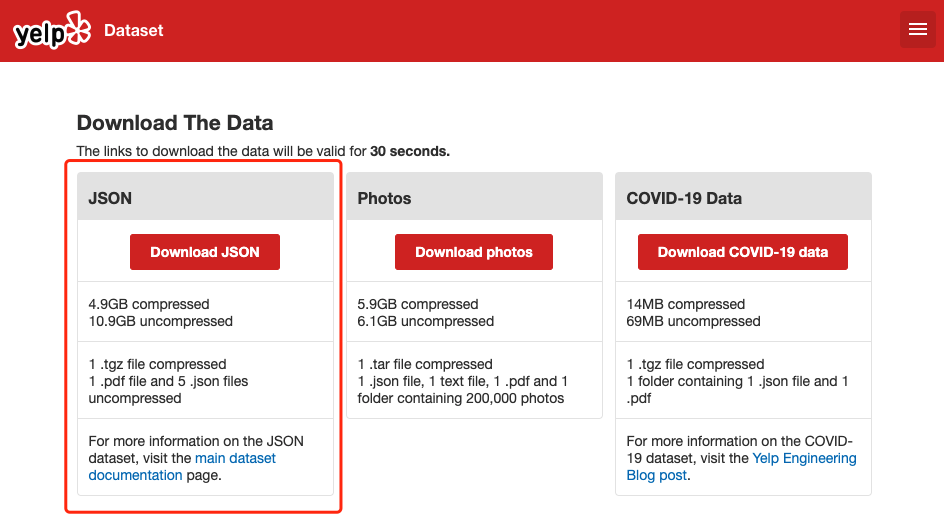

In [2]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "yelp_website.png", width = 600, height = 300)

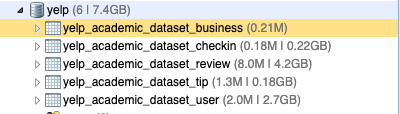

In [3]:
Image(filename = "yelp_json.png", width = 600, height = 300)

In [4]:
import pandas as pd
import json as json
pd.set_option('display.max_colwidth', None)

## Users

Read "yelp_academic_dataset_user" from JSON

In [2]:
with open('yelp_academic_dataset_user.json') as u:
    lines = u.read().splitlines()
    df_user = pd.DataFrame(lines)

In [3]:
df_user

,0
0,"{""user_id"":""ntlvfPzc8eglqvk92iDIAw"",""name"":""Ra..."
1,"{""user_id"":""FOBRPlBHa3WPHFB5qYDlVg"",""name"":""Mi..."
2,"{""user_id"":""zZUnPeh2hEp0WydbAZEOOg"",""name"":""Ma..."
3,"{""user_id"":""QaELAmRcDc5TfJEylaaP8g"",""name"":""Jo..."
4,"{""user_id"":""xvu8G900tezTzbbfqmTKvA"",""name"":""An..."
...,...
1968698,"{""user_id"":""gDC6V3sfu9SixRic9hkEQQ"",""name"":""La..."
1968699,"{""user_id"":""VEAWhS_RF-cKSUflmbCn7Q"",""name"":""Fr..."
1968700,"{""user_id"":""toAMthOzk2VDBgpW7Hu3eA"",""name"":""Gr..."
1968701,"{""user_id"":""hNX_EqOMImKGUx4g1x532A"",""name"":""RJ..."


In [4]:
df_user.columns = ['json_element']
df_user['json_element'].apply(json.loads)
yelp_user = pd.json_normalize(df_user['json_element'].apply(json.loads))
yelp_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968698,gDC6V3sfu9SixRic9hkEQQ,Larry,9,2014-04-27 16:17:05,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1968699,VEAWhS_RF-cKSUflmbCn7Q,Frank,10,2011-10-06 23:38:14,21,12,4,,None,0,...,0,0,0,0,0,0,0,0,0,0
1968700,toAMthOzk2VDBgpW7Hu3eA,Greg,1,2016-05-08 16:42:58,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1968701,hNX_EqOMImKGUx4g1x532A,RJ,2,2019-06-22 21:39:22,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
list(yelp_user.columns)

['user_id',
 'name',
 'review_count',
 'yelping_since',
 'useful',
 'funny',
 'cool',
 'elite',
 'friends',
 'fans',
 'average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos']

Delete unnecessary columns in "yelp_user" and saved as "yelp_user_updated"

In [19]:
yelp_user_updated = yelp_user.drop([
 'name',
 'useful',
 'funny',
 'cool',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos',
 'friends'], axis=1)

In [20]:
yelp_user_updated

,user_id,review_count,yelping_since,elite,fans,average_stars
0,ntlvfPzc8eglqvk92iDIAw,553,2007-07-06 03:27:11,,14,3.57
1,FOBRPlBHa3WPHFB5qYDlVg,564,2008-04-28 01:29:25,"2008,2009,2010,2011,2012,2013",27,3.84
2,zZUnPeh2hEp0WydbAZEOOg,60,2008-08-28 23:40:05,2010,5,3.44
3,QaELAmRcDc5TfJEylaaP8g,206,2008-09-20 00:08:14,2009,6,3.08
4,xvu8G900tezTzbbfqmTKvA,485,2008-08-09 00:30:27,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,4.37
...,...,...,...,...,...,...
1968698,gDC6V3sfu9SixRic9hkEQQ,9,2014-04-27 16:17:05,,0,3.56
1968699,VEAWhS_RF-cKSUflmbCn7Q,10,2011-10-06 23:38:14,,0,2.30
1968700,toAMthOzk2VDBgpW7Hu3eA,1,2016-05-08 16:42:58,,0,1.00
1968701,hNX_EqOMImKGUx4g1x532A,2,2019-06-22 21:39:22,,0,1.00


Replace "," with "/" in order to process the csv files into MySQL DB

In [36]:
yelp_user_updated['elite'] = [x.replace(',', '/') for x in yelp_user_updated['elite']];
yelp_user_updated['user_id'] = [x.replace(',', '/') for x in yelp_user_updated['user_id']];
yelp_user_updated['yelping_since'] = [x.replace(',', '/') for x in yelp_user_updated['yelping_since']];

In [42]:
yelp_user_updated

,user_id,review_count,yelping_since,elite,fans,average_stars
0,ntlvfPzc8eglqvk92iDIAw,553,2007-07-06 03:27:11,,14,3.57
1,FOBRPlBHa3WPHFB5qYDlVg,564,2008-04-28 01:29:25,2008/2009/2010/2011/2012/2013,27,3.84
2,zZUnPeh2hEp0WydbAZEOOg,60,2008-08-28 23:40:05,2010,5,3.44
3,QaELAmRcDc5TfJEylaaP8g,206,2008-09-20 00:08:14,2009,6,3.08
4,xvu8G900tezTzbbfqmTKvA,485,2008-08-09 00:30:27,2009/2010/2011/2012/2014/2015/2016/2017/2018,78,4.37
...,...,...,...,...,...,...
1968698,gDC6V3sfu9SixRic9hkEQQ,9,2014-04-27 16:17:05,,0,3.56
1968699,VEAWhS_RF-cKSUflmbCn7Q,10,2011-10-06 23:38:14,,0,2.30
1968700,toAMthOzk2VDBgpW7Hu3eA,1,2016-05-08 16:42:58,,0,1.00
1968701,hNX_EqOMImKGUx4g1x532A,2,2019-06-22 21:39:22,,0,1.00


Save the Dataframe to local as csv file

In [43]:
yelp_user_updated.to_csv(r'~/Downloads/user.csv', index=False)

## Review

Read "yelp_academic_dataset_review" from JSON

In [14]:
with open('yelp_academic_dataset_review.json') as r:
    lines = r.read().splitlines()
    df_review = pd.DataFrame(lines)

In [15]:
df_review

,0
0,"{""review_id"":""xQY8N_XvtGbearJ5X4QryQ"",""user_id"":""OwjRMXRC0KyPrIlcjaXeFQ"",""business_id"":""-MhfebM0QIsKt87iDN-FNw"",""stars"":2.0,""useful"":5,""funny"":0,""cool"":0,""text"":""As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call \""cozy\"" or \""charming\"" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it's not kid friendly at all. Seriously, don't bring them.\n* the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the art in a certain sequence, whether it be by historical period or cultural significance (this is how audio guides are usually developed). When I arrived in the gallery I could not tell where to start, and security was certainly not helpful. I was told to \""just look around\"" and \""do whatever.\"" \n\nAt such a *fine* institution, I find the lack of knowledge and respect for the art appalling."",""date"":""2015-04-15 05:21:16""}"
1,"{""review_id"":""UmFMZ8PyXZTY2QcwzsfQYA"",""user_id"":""nIJD_7ZXHq-FX8byPMOkMQ"",""business_id"":""lbrU8StCq3yDfr-QMnGrmQ"",""stars"":1.0,""useful"":1,""funny"":1,""cool"":0,""text"":""I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said \""you know what? That's fine.\"", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place.\n\nBottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!"",""date"":""2013-12-07 03:16:52""}"
2,"{""review_id"":""LG2ZaYiOgpr2DK_90pYjNw"",""user_id"":""V34qejxNsCbcgD8C0HVk-Q"",""business_id"":""HQl28KMwrEKHqhFrrDqVNQ"",""stars"":5.0,""useful"":1,""funny"":0,""cool"":0,""text"":""I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!"",""date"":""2015-12-05 03:18:11""}"
3,"{""review_id"":""i6g_oA9Yf9Y31qt0wibXpw"",""user_id"":""ofKDkJKXSKZXu5xJN

In [21]:
df_review.columns = ['json_element']
df_review['json_element'].apply(json.loads)
yelp_review = pd.json_normalize(df_review['json_element'].apply(json.loads))
yelp_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call ""cozy"" or ""charming"" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it's not kid friendly at all. Seriously, don't bring them.\n* the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the art in a certain sequence, whether it be by historical period or cultural significance (this is how audio guides are usually developed). When I arrived in the gallery I could not tell where to start, and security was certainly not helpful. I was told to ""just look around"" and ""do whatever."" \n\nAt such a *fine* institution, I find the lack of knowledge and respect for the art appalling.",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place.\n\nBottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!",2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless manager, who seeing us with barely nibbled entrees\non plates shoved forward for pickup, thanked us\nperfunctorily for our patronage;\n\nWe're from the Texas Hill Country;\ndown there, we jail critters \nwho serve 

In [44]:
list(yelp_review.columns)

['review_id',
 'user_id',
 'business_id',
 'stars',
 'useful',
 'funny',
 'cool',
 'text',
 'date']

Delete unnecessary columns in "yelp_review" and saved as "yelp_review_updated"

In [45]:
yelp_review_updated = yelp_review.drop([
 'useful',
 'funny',
 'cool',
 'text'
], axis=1)

In [46]:
yelp_review_updated

,review_id,user_id,business_id,stars,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,2017-01-14 21:56:57
...,...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1.0,2019-12-11 01:07:06
8021118,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3.0,2019-12-10 04:15:00
8021119,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5.0,2019-06-06 15:01:53
8021120,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3.0,2018-07-05 18:45:21


Replace "," with "/" in order to process the csv files into MySQL DB

In [47]:
yelp_review_updated['review_id'] = [x.replace(',', '/') for x in yelp_review_updated['review_id']];
yelp_review_updated['user_id'] = [x.replace(',', '/') for x in yelp_review_updated['user_id']];
yelp_review_updated['business_id'] = [x.replace(',', '/') for x in yelp_review_updated['business_id']];

In [48]:
yelp_review_updated

,review_id,user_id,business_id,stars,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,2017-01-14 21:56:57
...,...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1.0,2019-12-11 01:07:06
8021118,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3.0,2019-12-10 04:15:00
8021119,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5.0,2019-06-06 15:01:53
8021120,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3.0,2018-07-05 18:45:21


Save the Dataframe to local as csv file

In [49]:
yelp_review_updated.to_csv(r'~/Downloads/review.csv', index=False)

## Business 

Read "yelp_academic_dataset_business" from JSON

In [16]:
with open('yelp_academic_dataset_business.json') as b:
    lines = b.read().splitlines()
    df_business = pd.DataFrame(lines)

In [17]:
df_business

,0
0,"{""business_id"":""f9NumwFMBDn751xgFiRbNA"",""name"":""The Range At Lake Norman"",""address"":""10913 Bailey Rd"",""city"":""Cornelius"",""state"":""NC"",""postal_code"":""28031"",""latitude"":35.4627242,""longitude"":-80.8526119,""stars"":3.5,""review_count"":36,""is_open"":1,""attributes"":{""BusinessAcceptsCreditCards"":""True"",""BikeParking"":""True"",""GoodForKids"":""False"",""BusinessParking"":""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"",""ByAppointmentOnly"":""False"",""RestaurantsPriceRange2"":""3""},""categories"":""Active Life, Gun\/Rifle Ranges, Guns & Ammo, Shopping"",""hours"":{""Monday"":""10:0-18:0"",""Tuesday"":""11:0-20:0"",""Wednesday"":""10:0-18:0"",""Thursday"":""11:0-20:0"",""Friday"":""11:0-20:0"",""Saturday"":""11:0-20:0"",""Sunday"":""13:0-18:0""}}"
1,"{""business_id"":""Yzvjg0SayhoZgCljUJRF9Q"",""name"":""Carlos Santo, NMD"",""address"":""8880 E Via Linda, Ste 107"",""city"":""Scottsdale"",""state"":""AZ"",""postal_code"":""85258"",""latitude"":33.5694041,""longitude"":-111.8902637,""stars"":5.0,""review_count"":4,""is_open"":1,""attributes"":{""GoodForKids"":""True"",""ByAppointmentOnly"":""True""},""categories"":""Health & Medical, Fitness & Instruction, Yoga, Active Life, Pilates"",""hours"":null}"
2,"{""business_id"":""XNoUzKckATkOD1hP6vghZg"",""name"":""Felinus"",""address"":""3554 Rue Notre-Dame O"",""city"":""Montreal"",""state"":""QC"",""postal_code"":""H4C 1P4"",""latitude"":45.479984,""longitude"":-73.58007,""stars"":5.0,""review_count"":5,""is_open"":1,""attributes"":null,""categories"":""Pets, Pet Services, Pet Groomers"",""hours"":null}"
3,"{""business_id"":""6OAZjbxqM5ol29BuHsil3w"",""name"":""Nevada House of Hose"",""address"":""1015 Sharp Cir"",""city"":""North Las Vegas"",""state"":""NV"",""postal_code"":""89030"",""latitude"":36.2197281,""longitude"":-115.1277255,""stars"":2.5,""review_count"":3,""is_open"":0,""attributes"":{""BusinessAcceptsCreditCards"":""True"",""ByAppointmentOnly"":""False"",""DogsAllowed"":""True"",""BikeParking"":""True"",""BusinessParking"":""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"",""RestaurantsPriceRange2"":""4""},""categories"":""Hardware Stores, Home Services, Building Supplies, Home & Garden, Shopping"",""hours"":{""Monday"":""7:0-16:0"",""Tuesday"":""7:0-16:0"",""Wednesday"":""7:0-16:0"",""Thursday"":""7:0-16:0"",""Friday"":""7:0-16:0""}}"
4,"{""business_id"":""51M2Kk903DFYI6gnB5I6SQ"",""name"":""USE MY GUY SERVICES LLC"",""address"":""4827 E Downing Cir"",""city"":""Mesa"",""state"":""AZ"",""postal_code"":""85205"",""latitude"":33.4280652,""longitude"":-111.7266485,""stars"":4.5,""review_count"":26,""is_open"":1,""attributes"":{""BusinessAcceptsCreditCards"":""True"",""ByAppointmentOnly"":""True""},""categories"":""Home Services, Plumbing, Electricians, Handyman, Contractors"",""hours"":{""Monday"":""0:0-0:0"",""Tuesday"":""9:0-16:0"",""Wednesday"":""9:0-16:0"",""Thursday"":""9:0-16:0"",""Friday"":""9:0-16:0""}}"
...,...
209388,"{""business_id"":""9Q0fPWAjUweoFDk0kafuzQ"",""name"":""Nishi Sushi"",""address"":""9750 Weston Road"",""city"":""Vaughan"",""state"":""ON"",""postal_code"":""L4H 2P2"",""latitude"":43.8385554626,""longitude"":-79.5598231224,""stars"":4.0,""review_count"":5,""is_open"":0,""attributes"":{""Ambience"":""{'romantic': False, 'intimate': False, 'classy': False, 'upscale': False, 'touristy': False, 'trendy': False, 'hipster': False, 'casual': False}"",""RestaurantsReservations"":""True"",""OutdoorSeating"":""False"",""HasTV"":""False"",""NoiseLevel"":""u'quiet'"",""RestaurantsAttire"":""u'casual'"",""BusinessParking"":""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"",""WiFi"":""'free'"",""RestaurantsGoodForGroups"":""True"",""RestaurantsPriceRange2"":""2"",""GoodForKids"":""True"",""RestaurantsDelivery"":""False"",""Alcohol"":""u'beer_and_wine'"",""RestaurantsTakeOut"":""True""},""categories"":""Japanese

In [22]:
df_business.columns = ['json_element']
df_business['json_element'].apply(json.loads)
yelp_business = pd.json_normalize(df_business['json_element'].apply(json.loads))
yelp_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
list(yelp_business.columns)

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'categories',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.BikeParking',
 'attributes.GoodForKids',
 'attributes.BusinessParking',
 'attributes.ByAppointmentOnly',
 'attributes.RestaurantsPriceRange2',
 'hours.Monday',
 'hours.Tuesday',
 'hours.Wednesday',
 'hours.Thursday',
 'hours.Friday',
 'hours.Saturday',
 'hours.Sunday',
 'hours',
 'attributes',
 'attributes.DogsAllowed',
 'attributes.WiFi',
 'attributes.RestaurantsAttire',
 'attributes.RestaurantsTakeOut',
 'attributes.NoiseLevel',
 'attributes.RestaurantsReservations',
 'attributes.RestaurantsGoodForGroups',
 'attributes.HasTV',
 'attributes.Alcohol',
 'attributes.RestaurantsDelivery',
 'attributes.OutdoorSeating',
 'attributes.Caters',
 'attributes.WheelchairAccessible',
 'attributes.AcceptsInsurance',
 'attributes.RestaurantsTableService',
 'attributes.Ambience',
 'attributes.Goo

Delete unnecessary columns in "yelp_business" and saved as "yelp_business_updated"

In [52]:
yelp_business_updated = yelp_business.drop([
 'attributes.BikeParking',
 'attributes.GoodForKids',
 'attributes.DogsAllowed',
 'attributes.RestaurantsAttire',
 'attributes.RestaurantsGoodForGroups',
 'attributes.HasTV',
 'attributes.Alcohol',
 'attributes.Caters',
 'attributes.WheelchairAccessible',
 'attributes.AcceptsInsurance',
 'attributes.RestaurantsTableService',
 'attributes.Ambience',
 'attributes.HappyHour',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.BYOB',
 'attributes.Corkage',
 'attributes.GoodForDancing',
 'attributes.CoatCheck',
 'attributes.BestNights',
 'attributes.Music',
 'attributes.HairSpecializesIn',
 'attributes.BYOBCorkage',
 'attributes.AgesAllowed',
 'attributes.RestaurantsCounterService'], axis=1)

In [53]:
yelp_business_updated

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.RestaurantsTakeOut,attributes.NoiseLevel,attributes.RestaurantsReservations,attributes.RestaurantsDelivery,attributes.OutdoorSeating,attributes.GoodForMeal,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,...,True,u'quiet',True,False,False,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,...,True,u'average',False,False,True,"{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",NaN,NaN,False,NaN
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace "," with "/" in order to process the csv files into MySQL DB

In [56]:
yelp_business_updated['address'] = [x.replace(',', '/') for x in yelp_business_updated['address']];
yelp_business_updated['name'] = [x.replace(',', '/') for x in yelp_business_updated['name']];
yelp_business_updated['business_id'] = [x.replace(',', '/') for x in yelp_business_updated['business_id']];
yelp_business_updated['attributes.BusinessParking'] = [str(x).replace(',', '/') for x in yelp_business_updated['attributes.BusinessParking']];
yelp_business_updated['attributes.GoodForMeal'] = [str(x).replace(',', '/') for x in yelp_business_updated['attributes.GoodForMeal']];
yelp_business_updated['categories'] = [str(x).replace(',', '/') for x in yelp_business_updated['categories']];

Save the Dataframe to local as csv file

In [58]:
yelp_business_updated.to_csv(r'~/Downloads/business.csv', index=False)

## Data Wrangling thru SQL

This part used MySQL to clean three tables

In [ ]:
### Business table
USE yelp;
#Change data type of 'date' from TEXT to DATETIME
ALTER TABLE `yelp`.`review` 
CHANGE COLUMN `date` `date` DATETIME NULL DEFAULT NULL ;

#CREATE back_up table for business, review and user
CREATE TABLE business_backup LIKE business;
INSERT business_backup SELECT * FROM business;
# 209393 records

CREATE TABLE review_backup LIKE review;
INSERT review_backup SELECT * FROM review;
# 8021122 records

CREATE TABLE user_backup LIKE user;
INSERT user_backup SELECT * FROM user;
# 1968703 records

#Delete record when state is not NV
DELETE FROM business
WHERE state <> 'NV'
# 170309 records

#Delete record when store is not open(permanently closed)
DELETE FROM yelp.business 
WHERE is_open = 0
# 7904 records

#Delete record when store didn't belong to restaurant or coffee
DELETE
FROM
	business
WHERE
	categories not like '%restaurants%' and
    categories not like '%coffee%' 
# 25375 records

#After deletion
SELECT count(*) FROM yelp.business
# 5805 records

#Delete unnecssary columns
ALTER TABLE business
DROP COLUMN attributes_Parking,
DROP COLUMN attributes_goodformeal,
DROP COLUMN attributes_dietaryrestrictions,
DROP COLUMN attributes_drivethru,
DROP COLUMN attributes_open24hours,
DROP COLUMN hours,
DROP COLUMN attributes;

#Replace empty and none to True for attributes_CreditCards
UPDATE business
SET attributes_CreditCards = 'True'
WHERE attributes_CreditCards = ''

UPDATE business
SET attributes_CreditCards = 'True'
WHERE attributes_CreditCards = 'None'

# Replace Empty and None to False for attributes_Appointment_Only
UPDATE business
SET attributes_Appointment_Only = 'False'
WHERE attributes_Appointment_Only = 'None'

UPDATE business
SET attributes_Appointment_Only = 'False'
WHERE attributes_Appointment_Only = ''

#Replace Empty and None to the corresponding PriceRange number by portion
CREATE TABLE `yelp`.`attributes_PriceRange` (
  `business_id` VARCHAR(30) NULL);
Insert attributes_PriceRange
SELECT
	business_id
FROM
	business
WHERE
	attributes_PriceRange = '' or
    attributes_PriceRange = 'None'
# 652 records

CREATE TABLE `yelp`.`attributes_PriceRange_50` (
  `business_id` VARCHAR(30) NULL);
Insert attributes_PriceRange_50
SELECT
	business_id
FROM
	attributes_PriceRange
WHERE
    rand() < 0.5;
# 320 records


CREATE TABLE `yelp`.`attributes_PriceRange_45` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_PriceRange_45
SELECT 
	b1.business_id
FROM 
	attributes_PriceRange b1
	LEFT JOIN attributes_PriceRange_50 b2 ON b1.business_id = b2.business_id
WHERE 
	b2.business_id IS NULL AND
	rand() < 0.9;
# 302 records

CREATE TABLE `yelp`.`attributes_PriceRange_3` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_PriceRange_3
SELECT 
	b1.business_id
FROM 
	attributes_PriceRange b1
	LEFT JOIN attributes_PriceRange_50 b2 ON b1.business_id = b2.business_id
    LEFT JOIN attributes_PriceRange_45 b3 ON b1.business_id = b3.business_id
WHERE 
	b2.business_id IS NULL AND
    b3.business_id IS NULL AND
	rand() < 0.6;
# 18 records


CREATE TABLE `yelp`.`attributes_PriceRange_2` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_PriceRange_2
SELECT 
	b1.business_id
FROM 
	attributes_PriceRange b1
	LEFT JOIN attributes_PriceRange_50 b2 ON b1.business_id = b2.business_id
    LEFT JOIN attributes_PriceRange_45 b3 ON b1.business_id = b3.business_id
    LEFT JOIN attributes_PriceRange_3 b4 ON b1.business_id = b4.business_id
WHERE 
	b2.business_id IS NULL AND
    b3.business_id IS NULL AND
    b4.business_id IS NULL
# 12 records

UPDATE business
SET attributes_PriceRange = '1'
WHERE business_id in 
(
	SELECT *
	FROM
		yelp.attributes_PriceRange_50
)

UPDATE business
SET attributes_PriceRange = '2'
WHERE business_id in 
(
	SELECT *
	FROM
		yelp.attributes_PriceRange_45
)

UPDATE business
SET attributes_PriceRange = '3'
WHERE business_id in 
(
	SELECT *
	FROM
		yelp.attributes_PriceRange_3
)

UPDATE business
SET attributes_PriceRange = '3'
WHERE business_id in 
(
	SELECT *
	FROM
		yelp.attributes_PriceRange_3
)


# Update empty reocrd to 11-21 when all 7 days are empty
UPDATE business
SET monday = '11:0-21:0',
tuesday = '11:0-21:0',
wednesday = '11:0-21:0',
thursday = '11:0-21:0',
friday = '11:0-21:0',
saturday = '11:0-21:0',
sunday = '11:0-21:0'
WHERE monday = '' and 
tuesday = '' and
wednesday = '' and
thursday = '' and
friday = '' and
saturday = '' and
sunday = '' 
# 570 records

# Replace Paid and Empty to No, Replace Free to Yes to attributes_wifi
UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = ''
# 1058 records

UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = 'u''no'''
# 1322 records

UPDATE business
SET attributes_wifi = 'Yes'
WHERE attributes_wifi = 'u''free'''
# 1440 records

UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = '''no'''
# 1021 records

UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = 'u''paid'''
# 34 records

UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = 'None'
# 12 records

UPDATE business
SET attributes_wifi = 'No'
WHERE attributes_wifi = '''paid'''
# 21 records

UPDATE business
SET attributes_wifi = 'Yes'
WHERE attributes_wifi = '''free'''
# 897 records

#Replace None and Empty to True for attributes_takeout
UPDATE business
SET attributes_takeout = 'True'
WHERE attributes_takeout = ''
# 485 records

UPDATE business
SET attributes_takeout = 'True'
WHERE attributes_takeout = 'None'
# 13 records

#Replace Empty and None to the corresponding NoiseLevel number by portion
UPDATE business
SET attributes_noiselevel = 'average'
WHERE attributes_noiselevel = 'u''average'''
# 2355 records

UPDATE business
SET attributes_noiselevel = 'average'
WHERE attributes_noiselevel = '''average'''
# 863 records

UPDATE business
SET attributes_noiselevel = 'quiet'
WHERE 
	attributes_noiselevel = '''quiet''' or 
    attributes_noiselevel = 'u''quiet''' 
# 606 records

UPDATE business
SET attributes_noiselevel = 'loud'
WHERE 
	attributes_noiselevel = '''loud''' or 
    attributes_noiselevel = 'u''loud'''
# 221 records

UPDATE business
SET attributes_noiselevel = 'very_loud'
WHERE 
	attributes_noiselevel = '''very_loud''' or 
    attributes_noiselevel = 'u''very_loud'''
# 81 records

CREATE TABLE `yelp`.`attributes_NoiseLevel` (
  `business_id` VARCHAR(30) NULL);
INSERT attributes_NoiseLevel
SELECT
	business_id
FROM
	business
WHERE
	attributes_noiselevel = '' OR
    attributes_noiselevel = 'None'
# 1679 records

CREATE TABLE `yelp`.`attributes_NoiseLevel_average` (
  `business_id` VARCHAR(30) NULL);
Insert attributes_NoiseLevel_average
SELECT
	business_id
FROM
	attributes_NoiseLevel
WHERE
    rand() < 0.78;
# 1312 records

CREATE TABLE `yelp`.`attributes_NoiseLevel_quiet` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_NoiseLevel_quiet
SELECT 
	b1.business_id
FROM 
	attributes_NoiseLevel b1
	LEFT JOIN attributes_NoiseLevel_average b2 ON b1.business_id = b2.business_id
WHERE 
	b2.business_id IS NULL AND
	rand() < 0.68;
# 241 records

CREATE TABLE `yelp`.`attributes_NoiseLevel_loud` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_NoiseLevel_loud
SELECT 
	b1.business_id
FROM 
	attributes_NoiseLevel b1
	LEFT JOIN attributes_NoiseLevel_average b2 ON b1.business_id = b2.business_id
    LEFT JOIN attributes_NoiseLevel_quiet b3 ON b1.business_id = b3.business_id
WHERE 
	b2.business_id IS NULL AND
    b3.business_id IS NULL AND
	rand() < 0.71;
# 90 records

CREATE TABLE `yelp`.`attributes_NoiseLevel_very_loud` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_NoiseLevel_very_loud
SELECT 
	b1.business_id
FROM 
	attributes_NoiseLevel b1
	LEFT JOIN attributes_NoiseLevel_average b2 ON b1.business_id = b2.business_id
    LEFT JOIN attributes_NoiseLevel_quiet b3 ON b1.business_id = b3.business_id
    LEFT JOIN attributes_NoiseLevel_loud b4 ON b1.business_id = b4.business_id
    
WHERE 
	b2.business_id IS NULL AND
    b3.business_id IS NULL AND
    b4.business_id IS NULL
# 36 records

UPDATE business
SET attributes_noiselevel = 'average'
WHERE 
	business_id in (
    SELECT * FROM yelp.attributes_NoiseLevel_average
    )
# 1312 records

UPDATE business
SET attributes_noiselevel = 'quiet'
WHERE 
	business_id in (
    SELECT * FROM yelp.attributes_NoiseLevel_quiet
    )
# 241 records

UPDATE business
SET attributes_noiselevel = 'loud'
WHERE 
	business_id in (
    SELECT * FROM yelp.attributes_NoiseLevel_loud
    )
# 90 records

UPDATE business
SET attributes_noiselevel = 'very_loud'
WHERE 
	business_id in (
    SELECT * FROM yelp.attributes_NoiseLevel_very_loud
    )
# 36 records

#Replace attributes_reservations = None and '' to False
UPDATE business
SET attributes_reservations = 'False'
WHERE 
	attributes_reservations = ''
# 1075 records

UPDATE business
SET attributes_reservations = 'False'
WHERE 
	attributes_reservations = 'None'
# 11 records

#Replace Outdoor to yes others all no for attributes_smoking
UPDATE business
SET attributes_smoking = 'Yes'
WHERE 
	attributes_smoking = 'u''yes''' or 
    attributes_smoking = 'u''outdoor''' or
    attributes_smoking = '''outdoor'''
# 171 records

UPDATE business
SET attributes_smoking = 'No'
WHERE 
	attributes_smoking = 'u''no''' or 
    attributes_smoking = 'None' or
    attributes_smoking = '''no''' or
    attributes_smoking = ''
# 5634 records

#Add category column
ALTER TABLE yelp.business
ADD COLUMN `category` varchar(30)

Update yelp.business
SET category = 'Chinese'
WHERE categories like '%Chinese%'

Update yelp.business
SET category = 'Italian'
WHERE categories like '%Italian%'

Update yelp.business
SET category = 'Mexican'
WHERE categories like '%Mexican%'

Update yelp.business
SET category = 'Japanese'
WHERE categories like '%Japanese%'

Update yelp.business
SET category = 'Mediterranean'
WHERE categories like '%Mediterranean%'

Update yelp.business
SET category = 'American_New'
WHERE categories like '%American (New)%'

Update yelp.business
SET category = 'American_Traditional'
WHERE categories like '%American (Traditional)%'

Update yelp.business
SET category = 'Indian'
WHERE categories like '%Indian%'

Update yelp.business
SET category = 'Korean'
WHERE categories like '%Korean%'

Update yelp.business
SET category = 'Brazilian'
WHERE categories like '%Brazilian%'

Update yelp.business
SET category = 'Eritrean'
WHERE categories like '%Eritrean%'

Update yelp.business
SET category = 'Latin_American'
WHERE categories like '%Latin American%'

Update yelp.business
SET category = 'Hawaiian'
WHERE categories like '%Hawaiian%'

Update yelp.business
SET category = 'Cuban'
WHERE categories like '%Cuban%'

Update yelp.business
SET category = 'African'
WHERE categories like '%African%'

Update yelp.business
SET category = 'Egyptian'
WHERE categories like '%Egyptian%'

Update yelp.business
SET category = 'Caribbean'
WHERE categories like '%Caribbean%'

Update yelp.business
SET category = 'Austrian'
WHERE categories like '%Austrian%'

Update yelp.business
SET category = 'Thai'
WHERE categories like '%Thai%'

Update yelp.business
SET category = 'Ethiopian'
WHERE categories like '%Ethiopian%'

Update yelp.business
SET category = 'Peruvian'
WHERE categories like '%Peruvian%'

Update yelp.business
SET category = 'Iranian'
WHERE categories like '%Iranian%'

Update yelp.business
SET category = 'Modern_European'
WHERE categories like '%Modern European%'

Update yelp.business
SET category = 'Laotian'
WHERE categories like '%Laotian%'

Update yelp.business
SET category = 'British'
WHERE categories like '%British%'

Update yelp.business
SET category = 'Vietnamese'
WHERE category is null and categories like '%Vietnamese%'

Update yelp.business
SET category = 'Cajun'
WHERE category is null and categories like '%Cajun%'

Update yelp.business
SET category = 'Taiwanese'
WHERE category is null and categories like '%Taiwanese%'

Update yelp.business
SET category = 'Filipino'
WHERE category is null and categories like '%Filipino%'

Update business
SET category = 'Other'
WHERE category is null

#add columns
ALTER TABLE yelp.business
ADD COLUMN `fast_food` varchar(30),
ADD COLUMN `coffee` varchar(30),
ADD COLUMN `bar` varchar(30)

Update business SET fast_food = 'True' WHERE categories like '%fast food%'
Update business SET coffee = 'True' WHERE categories like '%coffee%'
Update business SET coffee = 'True' WHERE categories like '%cafe%'
Update business SET bar = 'True' WHERE categories like '%bar%'
Update business SET bar = 'True' WHERE categories like '%nightlife%'
Update business SET bar = 'False' WHERE bar is null
Update business SET coffee = 'False' WHERE coffee is null
Update business SET fast_food = 'False' WHERE fast_food is null

#Update Monday - Sunday when value is empty
Update business
SET monday = 'closed'
WHERE monday = ''

Update business
SET tuesday = 'closed'
WHERE tuesday = ''

Update business
SET wednesday = 'closed'
WHERE wednesday = ''

Update business
SET thursday = 'closed'
WHERE thursday = ''

Update business
SET friday = 'closed'
WHERE friday = ''

Update business
SET saturday = 'closed'
WHERE saturday = ''

Update business
SET sunday = 'closed'
WHERE sunday = ''

#Replace None and Empty to corresponding  value in attributes_delivery
CREATE TABLE `yelp`.`attributes_Delivery` (
  `business_id` VARCHAR(30) NULL);
INSERT attributes_Delivery
SELECT
	business_id
FROM
	business
WHERE
	attributes_Delivery = '' OR
    attributes_Delivery = 'None';
    
CREATE TABLE `yelp`.`attributes_Delivery_True` (
  `business_id` VARCHAR(30) NULL);
Insert attributes_Delivery_True
SELECT
	business_id
FROM
	attributes_Delivery
WHERE
    rand() < 0.52;
    
CREATE TABLE `yelp`.`attributes_Delivery_False` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_Delivery_False
SELECT 
	b1.business_id
FROM 
	attributes_Delivery b1
	LEFT JOIN attributes_Delivery_True b2 ON b1.business_id = b2.business_id
WHERE 
	b2.business_id IS NULL;

Update business
SET attributes_delivery = 'True'
WHERE business_id in
(
SELECT business_id FROM yelp.attributes_Delivery_True
)


Update business
SET attributes_delivery = 'False'
WHERE business_id in
(
SELECT business_id FROM yelp.attributes_Delivery_False
)

#Replace None and Empty to corresponding  value in attributes_outdoorseating
CREATE TABLE `yelp`.`attributes_OutdoorSeating` (
  `business_id` VARCHAR(30) NULL);
  
INSERT attributes_OutdoorSeating
SELECT
	business_id
FROM
	business
WHERE
	attributes_outdoorseating = '' OR
    attributes_outdoorseating = 'None';
    
CREATE TABLE `yelp`.`attributes_OutdoorSeating_True` (
  `business_id` VARCHAR(30) NULL);
Insert attributes_OutdoorSeating_True
SELECT
	business_id
FROM
	attributes_OutdoorSeating
WHERE
    rand() < 0.32;
    
CREATE TABLE `yelp`.`attributes_OutdoorSeating_False` (
  `business_id` VARCHAR(30) NULL);
Insert 
	attributes_OutdoorSeating_False
SELECT 
	b1.business_id
FROM 
	attributes_OutdoorSeating b1
	LEFT JOIN attributes_OutdoorSeating_True b2 ON b1.business_id = b2.business_id
WHERE 
	b2.business_id IS NULL;

Update business
SET attributes_outdoorseating = 'True'
WHERE business_id in
(
SELECT business_id FROM yelp.attributes_OutdoorSeating_True
)

Update business
SET attributes_outdoorseating = 'False'
WHERE business_id in
(
SELECT business_id FROM yelp.attributes_OutdoorSeating_False
)

#Update address to 'NA' when it is empty
Update business
SET address = 'NA'
WHERE address = ''

#Add primary key to business_id in business table
ALTER TABLE `yelp`.`business` 
CHANGE COLUMN `business_id` `business_id` VARCHAR(30) NOT NULL ,
ADD PRIMARY KEY (`business_id`);
;

###review table
#Alter table data type and primary key
ALTER TABLE `yelp`.`review` 
CHANGE COLUMN `review_id` `review_id` VARCHAR(30) NOT NULL ,
CHANGE COLUMN `user_id` `user_id` VARCHAR(30) NULL DEFAULT NULL ,
CHANGE COLUMN `business_id` `business_id` VARCHAR(30) NULL DEFAULT NULL ,
ADD PRIMARY KEY (`review_id`);
;

#Total records for 2019 in review table
SELECT count(*) FROM yelp.review
where EXTRACT(YEAR FROM review_date) = 2019
# 1215836 records

#Delete all records which year is not 2019
DELETE FROM review
WHERE
	EXTRACT(YEAR FROM review_date) <> 2019
# 6805286 records

DELETE FROM	
	review
WHERE
	review_id not in(
    SELECT review_id FROM(
		SELECT
			review_id
		FROM
			review join business on review.business_id = business.business_id) as c
			)
# 959529 records

### User table
# Modify data type of user table
ALTER TABLE `yelp`.`user` 
CHANGE COLUMN `user_id` `user_id` VARCHAR(30) NOT NULL ,
CHANGE COLUMN `yelping_since` `yelping_since` DATETIME NULL DEFAULT NULL ,
CHANGE COLUMN `elite` `elite` VARCHAR(150) NULL DEFAULT NULL ,
ADD PRIMARY KEY (`user_id`);
;

# Add months of account since built up
ALTER TABLE `yelp`.`user` 
ADD COLUMN `months` INT NULL DEFAULT NULL AFTER `yelping_since`;


UPDATE yelp.user
SET months = round(DATEDIFF('2019/12/31',yelping_since)/30,0) 

# Update elite column
UPDATE yelp.user
SET elite = 'False'
WHERE elite = ''

UPDATE yelp.user
SET elite = 'True'
WHERE elite <> 'False'

# Delete unrelated user_id in user table
DELETE FROM	
	`user`
WHERE
	user_id not in(
    SELECT user_id FROM(
		SELECT
			user_id
		FROM
			review join business on review.business_id = business.business_id) as c
			)

#Delete restaurant which has no rview
DELETE FROM business
WHERE business_id IN (
	SELECT business_id FROM( 
		SELECT 
			b.business_id
		FROM business b LEFT JOIN review r ON b.business_id = r.business_id
		WHERE r.review_id IS NULL
    ) as C
)
# 299 records

#Create business_review_user table use inner join, create id column
CREATE TABLE business_review_user LIKE business;
ALTER TABLE `yelp`.`business_review_user` 
ADD COLUMN `id` INT(10) NOT NULL AUTO_INCREMENT FIRST
ADD COLUMN `r_business_id` VARCHAR(30) NULL AFTER `r_user_id`,
ADD COLUMN `r_stars` DOUBLE NULL AFTER `r_business_id`,
ADD COLUMN `u_user_id` VARCHAR(30) NULL AFTER `r_review_date`,
ADD COLUMN `u_review_count` INT(11) NULL AFTER `u_user_id`,
CHANGE COLUMN `review_id` `r_review_id` VARCHAR(30) NULL DEFAULT NULL ,
CHANGE COLUMN `user_id` `r_user_id` VARCHAR(30) NULL DEFAULT NULL ,
CHANGE COLUMN `review_date` `r_review_date` DATETIME NULL DEFAULT NULL ,
CHANGE COLUMN `yelping_since` `u_yelping_since` DATETIME NULL DEFAULT NULL ,
CHANGE COLUMN `months` `u_months` INT(11) NULL DEFAULT NULL ,
CHANGE COLUMN `elite` `u_elite` VARCHAR(150) NULL DEFAULT NULL ,
CHANGE COLUMN `fans` `u_fans` INT(11) NULL DEFAULT NULL ,
CHANGE COLUMN `average_stars` `u_average_stars` DOUBLE NULL DEFAULT NULL,
ADD PRIMARY KEY (`id`);


INSERT INTO business_review_user (business_id,
`name`,
address,
city,
state,
postal_code,
latitude,
longitude,
stars,
review_count,
is_open,
categories,
category,
fast_food,
coffee,
bar,
attributes_CreditCards,
attributes_Appointment_Only,
attributes_PriceRange,
monday,
tuesday,
wednesday,
thursday,
friday,
saturday,
sunday,
attributes_wifi,
attributes_takeout,
attributes_noiselevel,
attributes_reservations,
attributes_delivery,
attributes_outdoorseating,
attributes_smoking,
r_review_id,
r_user_id,
r_business_id,
r_stars,
r_review_date,
u_user_id,
u_review_count,
u_yelping_since,
u_months,
u_elite,
u_fans,
u_average_stars
)
SELECT *
FROM
	business b JOIN review r on b.business_id = r.business_id
			   JOIN `user` u on r.user_id = u.user_id
ORDER BY
	b.business_id,
    r.review_date
#256307 records 

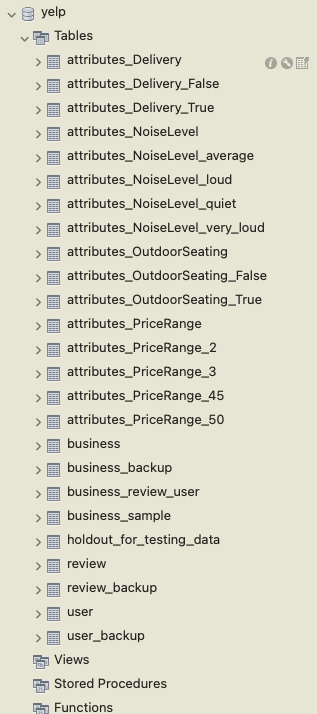

In [11]:
Image(filename = "MySQL_table_list.png", width = 600, height = 300)

This part is for analysis

In [ ]:
# Aggegate level of review's count by state for current open restaurant and coffee only.
SELECT
	business_backup.state,
    count(*) as count
FROM
	business_backup left JOIN review on business_backup.business_id = review.business_id 
WHERE 
	business_backup.is_open = 1 and 
	business_backup.categories like '%restaurants%'
GROUP BY state
ORDER BY count DESC


state  count
NV     1410160
AZ     1214813
ON     537452
NC     289126
OH     233714
PA     209717
QC     138625
WI     87719
AB     58917
IL     25883
SC     16318
NY     128
CA     95
TX     92
HI     51
CO     45
MB     36
VA     27
NE     18
FL     10
OR     9
BC     6
VT     5
AL     4
HPL    3
WA     3

# Aggregate level of review's count by state for current open restaurant and coffee in 2019
SELECT
	business_backup.state,
    count(*) as count
FROM
	business_backup JOIN review on business_backup.business_id = review.business_id 
WHERE 
	business_backup.is_open = 1 and 
	(business_backup.categories like '%restaurants%' or 
    business_backup.categories like '%coffee%') and
    EXTRACT(YEAR FROM review_date) = 2019
GROUP BY state
ORDER BY count DESC


state   count
NV      256307
AZ      220241
ON      82698
NC      60600
OH      40308
PA      38555
QC      20840
WI      11289
AB      6934
SC      4606
IL      3188
NY      33
CA      15
HI      10
TX      9
NE      9
VA      5
CO      4
MB      2
OR      2
BC      1
HPL     1
AL      1

	
/*
#Delete business_id when it is empty address
SELECT 
	COUNT(DISTINCT(business_id))
FROM 
	yelp.business
WHERE
	is_open = 1 AND
    categories LIKE '%restaurants%' AND
    state = 'NV'AND
    address = ''
*/

#Replace empty and none to True for attributes_CreditCards
SELECT 
		SUM(CASE WHEN attributes_CreditCards = 'True' THEN 1 ELSE 0 END) as 'TRUE',
        SUM(CASE WHEN attributes_CreditCards = 'False' THEN 1 ELSE 0 END) as 'FALSE',
        SUM(CASE WHEN attributes_CreditCards = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_CreditCards = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup
	

# Replace Empty and None to False for attributes_Appointment_Only
SELECT 
		SUM(CASE WHEN attributes_Appointment_Only = 'True' THEN 1 ELSE 0 END) as 'TRUE',
        SUM(CASE WHEN attributes_Appointment_Only = 'False' THEN 1 ELSE 0 END) as 'FALSE',
        SUM(CASE WHEN attributes_Appointment_Only = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_Appointment_Only = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup


#Replace Empty and None to the corresponding PriceRange number by portion
SELECT 
		SUM(CASE WHEN attributes_PriceRange = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_PriceRange = '1' THEN 1 ELSE 0 END) as '1',
        SUM(CASE WHEN attributes_PriceRange = '2' THEN 1 ELSE 0 END) as '2',
        SUM(CASE WHEN attributes_PriceRange = '3' THEN 1 ELSE 0 END) as '3',
        SUM(CASE WHEN attributes_PriceRange = '4' THEN 1 ELSE 0 END) as '4',
        SUM(CASE WHEN attributes_PriceRange = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup

Empty,  1,      2,      3,      4,     None,   All_records
651,    2578,   2331,   183,    61,    1,      5805
        2578,   2331,   183,    61,            5153
        50%     45%     3%      2%

#Weekday portion percentage
SELECT 
	SUM(CASE WHEN monday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Monday',
    SUM(CASE WHEN tuesday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Tuesday',
    SUM(CASE WHEN wednesday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Wednesday',
    SUM(CASE WHEN thursday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Thursday',
    SUM(CASE WHEN friday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Friday',
    SUM(CASE WHEN saturday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Saturday',
    SUM(CASE WHEN sunday = '' THEN 1 ELSE 0 END)/5309 * 100 AS 'Sunday', 
    COUNT(*) as 'All Record'
FROM 
	yelp.business_backup


#change all weekday for empty reocrd to 11-9
SELECT 
    *
FROM 
	yelp.business_backup
WHERE
	is_open = 1 AND
    categories LIKE '%restaurants%' AND
    state = 'NV'AND
    (Monday = '' AND
    Tuesday = '' AND
    Wednesday = '' AND
    Thursday = '' AND
    Friday = '' AND
    Saturday = '' AND
    Sunday = '')

# Replace Paid and Empty to No, Replace Free to Yes
SELECT 
	SUM(CASE WHEN attributes_wifi = '' THEN 1 ELSE 0 END) AS 'Empty',
    SUM(CASE WHEN attributes_wifi like '%no%'  THEN 1 ELSE 0 END) AS 'No',
    SUM(CASE WHEN attributes_wifi like '%free%' THEN 1 ELSE 0 END) AS 'Free',
    SUM(CASE WHEN attributes_wifi like '%paid%' THEN 1 ELSE 0 END) AS 'Paid'
FROM 
	yelp.business_backup


# Replace None and Empty to True for attributes_takeout
SELECT 
	SUM(CASE WHEN attributes_takeout = 'True' THEN 1 ELSE 0 END) AS 'True',
    SUM(CASE WHEN attributes_takeout = 'False' THEN 1 ELSE 0 END) AS 'False',
    SUM(CASE WHEN attributes_takeout = 'None' THEN 1 ELSE 0 END) AS 'None',
    SUM(CASE WHEN attributes_takeout = '' THEN 1 ELSE 0 END) AS ''
FROM 
	yelp.business_backup

#Replace Empty and None to the corresponding NoiseLevel number by portion
SELECT 
	SUM(CASE WHEN attributes_noiselevel like '%average%' THEN 1 ELSE 0 END) AS 'average',
    SUM(CASE WHEN attributes_noiselevel like '%quiet%' THEN 1 ELSE 0 END) AS 'quiet',
    SUM(CASE WHEN attributes_noiselevel like '%loud%' THEN 1 ELSE 0 END) AS 'loud',
    SUM(CASE WHEN attributes_noiselevel like '%very_loud%' THEN 1 ELSE 0 END) AS 'very loud',
    SUM(CASE WHEN attributes_noiselevel = 'None' THEN 1 ELSE 0 END) AS 'None',
    SUM(CASE WHEN attributes_noiselevel = '' THEN 1 ELSE 0 END) AS 'Empty'
FROM 
	yelp.business_backup

average   quiet   loud  very_loud   None   Empty   All
3218      606     221   81          2      1677    5805
3218      606     221   81                         4126
78%       15%     5%    2%


#Replace attributes_reservations = None and '' to False
SELECT 
		SUM(CASE WHEN attributes_reservations = 'True' THEN 1 ELSE 0 END) as 'TRUE',
        SUM(CASE WHEN attributes_reservations = 'False' THEN 1 ELSE 0 END) as 'FALSE',
        SUM(CASE WHEN attributes_reservations = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_reservations = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup
	

#Replace None and Empty to corresponding  value in attributes_delivery
SELECT 
		SUM(CASE WHEN attributes_delivery = 'True' THEN 1 ELSE 0 END) as 'TRUE',
        SUM(CASE WHEN attributes_delivery = 'False' THEN 1 ELSE 0 END) as 'FALSE',
        SUM(CASE WHEN attributes_delivery = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_delivery = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup

TRUE FALSE EMPTY NONE ALL
2538 2310  835   122  5805
2538 2310             4848
52%  48%               


#Replace None and Empty to corresponding  value in attributes_outdoorseating
SELECT 
		SUM(CASE WHEN attributes_outdoorseating = 'True' THEN 1 ELSE 0 END) as 'TRUE',
        SUM(CASE WHEN attributes_outdoorseating = 'False' THEN 1 ELSE 0 END) as 'FALSE',
        SUM(CASE WHEN attributes_outdoorseating = '' THEN 1 ELSE 0 END) as 'Empty',
        SUM(CASE WHEN attributes_outdoorseating = 'None' THEN 1 ELSE 0 END) as 'None',
        count(*) as 'All_records'
FROM 
	yelp.business_backup
TRUE FALSE EMPTY NONE ALL
1596 3374  832   3    5805
1596 3374             4970
32%  68%            



#Replace Outdoor to yes others all no
SELECT 
		SUM(CASE WHEN attributes_smoking like '%Yes%' THEN 1 ELSE 0 END) as 'Yes',
        SUM(CASE WHEN attributes_smoking like '%No%' THEN 1 ELSE 0 END) as 'No',
        SUM(CASE WHEN attributes_smoking = '' THEN 1 ELSE 0 END) as '',
        SUM(CASE WHEN attributes_smoking like '%None%' THEN 1 ELSE 0 END) as 'None',
        SUM(CASE WHEN attributes_smoking like '%Outdoor%' THEN 1 ELSE 0 END) as 'Outdoor',
        count(*) as 'All_records'
FROM 
	yelp.business_backup

Export "business_review_user" table as 'training_data.csv' for Preprocessing - Part 2

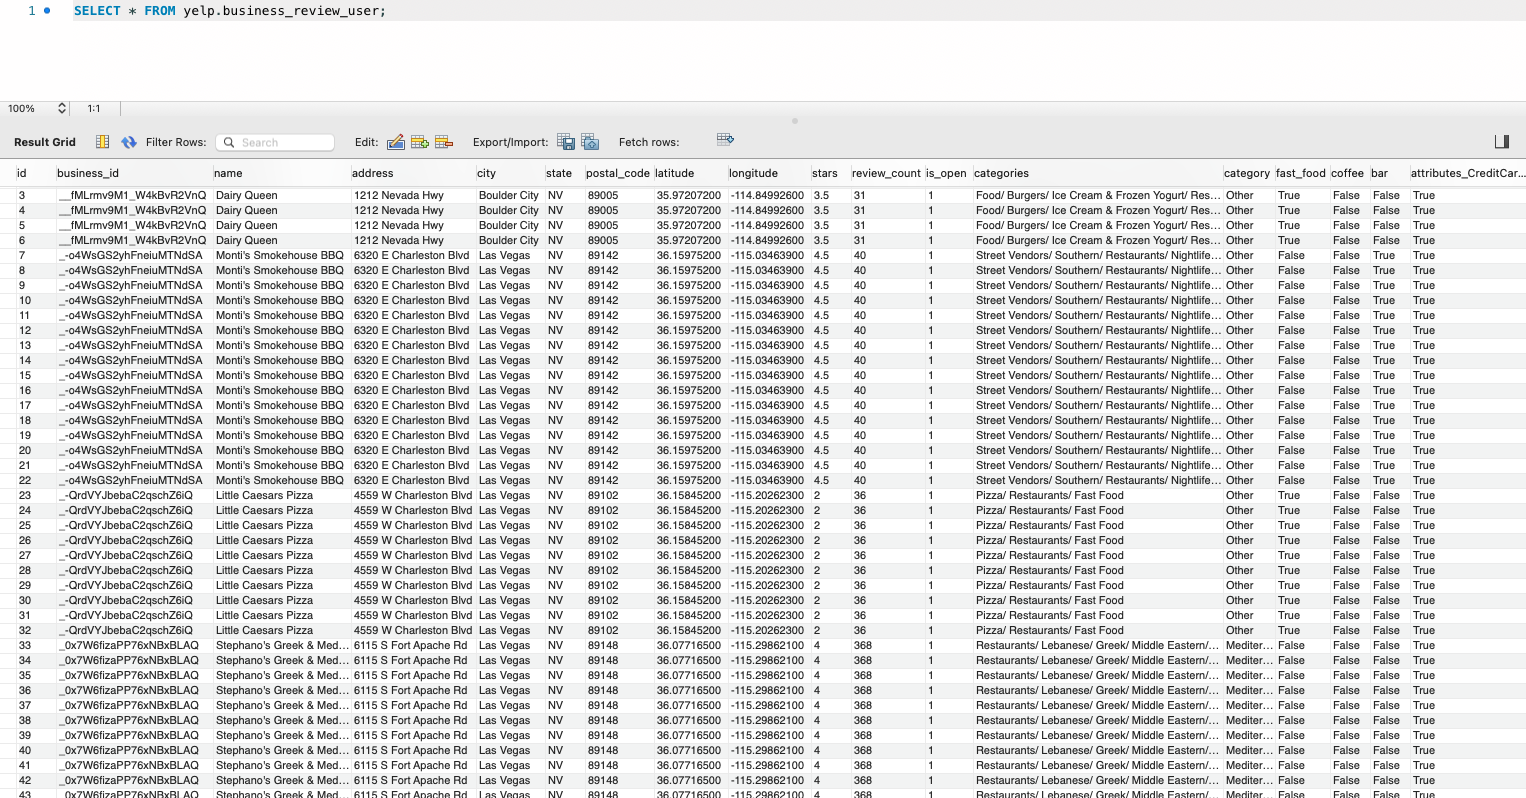

In [12]:
Image(filename = "business_review_user.png", width = 600, height = 300)